**Mission Statement**

Bellabeat is a high-tech manufacturer of health-focused products for women.
Analyze smart device fitness data from other devices to find new to the new growth opportunity for the company. Make a suggestion to help guide the marketing strategy.

**Ask**

a) Identify business task:

Using non-Bellabeat data to gain insight into how consumers use non-Bellabeat smart devices, and how those insights can be applied to Bellabeat products.

b)Key Stakeholders

	1. Urška Sršen, Bellabeat’s co-founder and Chief Creative Officer; 
	2. Sando Mur, Mathematician and Bellabeat’s cofounder;
	3. Bellabeat marketing analytics team.

Business Task

Analyze how other companies use smart devices and find a way to apply these new uses to Bellabeat products and marketing strategies.

**Prepare**

The credibility of the data being used Fitbit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius). This data set contains a personal fitness tracker from thirty Fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It also includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.


For this analysis, we will be focussing on features that require interaction from the user. We are focusing on this since the information would also need to be input into the Bellabeat subscription app. This mirroring could give a more accurate representation of the willingness of users to use these extra filters.




**Process**


Put data into google sheets, only looking at data 3 sheets:
* DailyActivity
* WeightLogInfo
* SleepDay


Sort and Filter Data 

Imported all data to google sheets.
After import, noticing the ID is coming throughout all tables 

Sleep Day sheet
	-Edited sleep date to remove time so that it doesn't cause issues with SQL - using text to column
	-Removed time since we are not using it in this analysis


Daily Active
	-date and time was not an issue with these sheets

WeightLogInfo
	-Edited date to remove time so that it doesn't cause issues with SQL - using text to column
	-Removed time since we are not using it in this analysis


BigQuery SQL
Loaded all google sheets into Big Query.

Validating that all Ids are the same length, correct any errors if found.

SELECT LENGTH(CAST(Id AS STRING)) FROM `capstone-project-356615.Fitbit.daily_activity`

SELECT Id FROM `capstone-project-356615.Fitbit.daily_activity` WHERE LENGTH(CAST(Id AS STRING)) < 10

SELECT Id FROM `capstone-project-356615.Fitbit.daily_activity` WHERE LENGTH(CAST(Id AS STRING)) > 10

SELECT Id FROM `capstone-project-356615.Fitbit.sleep_day` WHERE LENGTH(CAST(Id AS STRING)) > 10

SELECT Id FROM `capstone-project-356615.Fitbit.sleep_day` WHERE LENGTH(CAST(Id AS STRING)) < 10

SELECT Id FROM `capstone-project-356615.Fitbit.weight_log` WHERE LENGTH(CAST(Id AS STRING)) < 10

SELECT Id FROM `capstone-project-356615.Fitbit.weight_log` WHERE LENGTH(CAST(Id AS STRING)) > 10

There is no data to display for all the Queries

___

Creating Query to verify the total number of users per table
SELECT DISTINCT Id FROM `capstone-project-356615.Fitbit.sleep_day` 

SELECT DISTINCT Id FROM `capstone-project-356615.Fitbit.daily_activity` 

SELECT DISTINCT Id FROM `capstone-project-356615.Fitbit.weight_log` 

Results
* daily_activity = 33 unique user IDs
* sleep_day = 24 unique user IDs
* weight_log = 8 unique user IDs


**Analyze**

For analysis started by using Google Sheets and then finished with BigQuery SQL. 


*Logged Activity

Check if users in activity had logged any distances.
Ran in SQL:
SELECT DISTINCT Id FROM `capstone-project-356615.Fitbit.daily_activity` WHERE LoggedActivitiesDistance > 0

The result was 4 unique IDs that hadn't logged any activity

*Logged Weight

Based on the product information provided by the client brief. Although only 25% of users logged weight, it would be easy to add this feature to the Bellabeat app membership. 

*Logged Sleep

Based on numbers previously calculated, 24 of the users logged sleep. We can look into ways to simplify the ways to enter sleep into apps for tracking.



**Share**

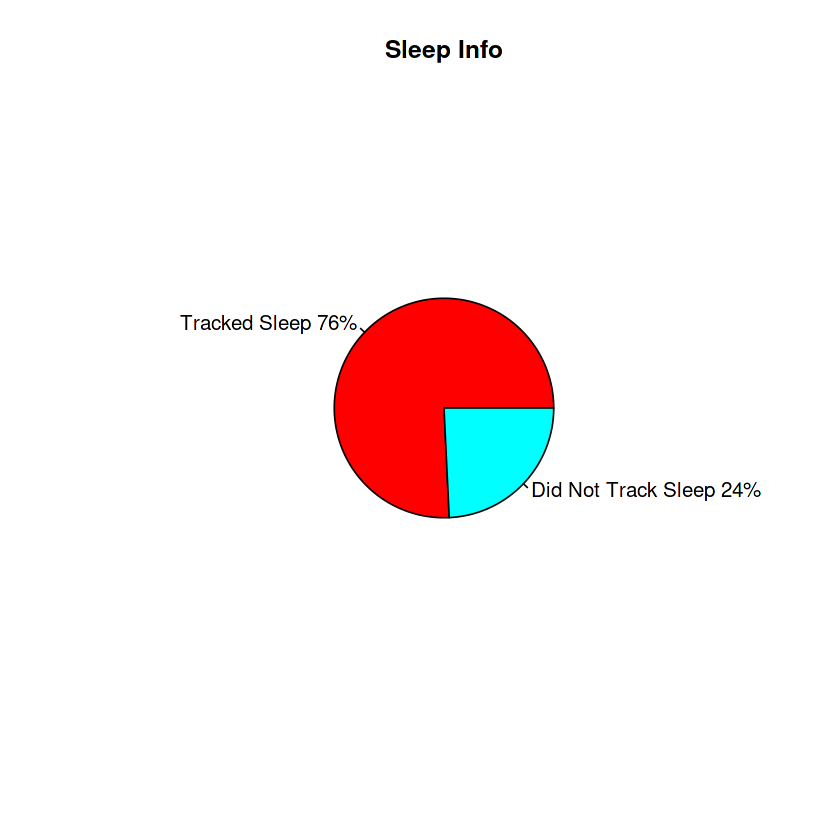

In [1]:

slices <- c(25, 8)
lbls <- c("Tracked Sleep", "Did Not Track Sleep")
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels
pie(slices, labels = lbls,col=rainbow(length(lbls)), main="Sleep Info")

**76% Logged Sleep**

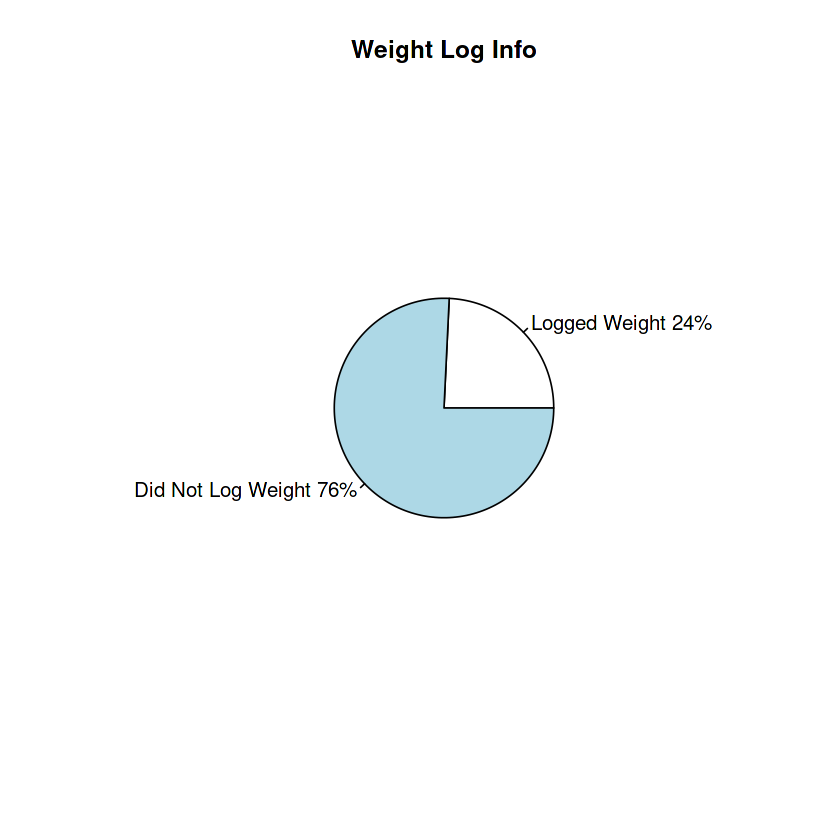

In [2]:
slices <- c(8, 25)
lbls <- c("Logged Weight", "Did Not Log Weight")
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels
pie(slices, labels = lbls, main="Weight Log Info")

**24% Logged Sleep**

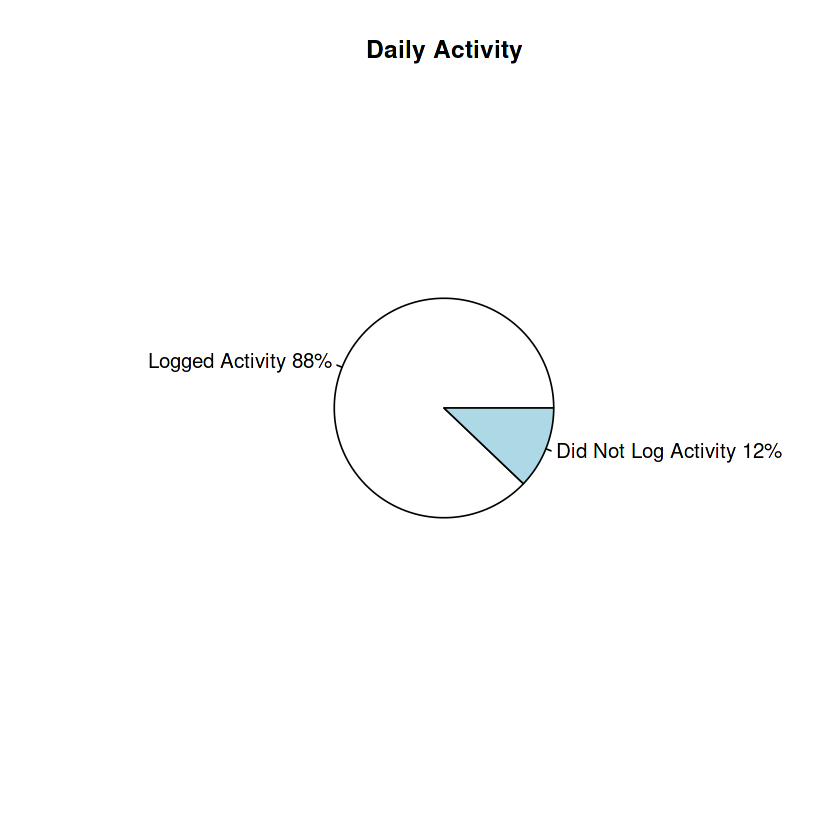

In [3]:
slices <- c(29, 4)
lbls <- c("Logged Activity", "Did Not Log Activity")
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels
pie(slices, labels = lbls, main="Daily Activity")

**88% Logged Activity**

**Act**

* Add weight loss to the subscription so that users can track it and improve health for the weight tracking check see if you can have Bluetooth link their smart scales to the app for tracking

* Makes entering sleep and activity easier, possibly add a prompt after the user's heart rate increase to indicate activity or decreases for several hours to indicate the user is sleeping

* Create an incentive for users when they add their activity and sleep, the compensation could be a free month of subscription or maybe a discount for their next Bellabeat purchase